### Practical 5: Madison Chester & Arturo Fredes

In [39]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

from QPGC import QPGenericConstraints
help(QPGenericConstraints)

Help on function QPGenericConstraints in module QPGC:

QPGenericConstraints(G, g, A, C, b, d)
    Convex optimization problem with equality and inequality constraints:
     
               min f(x)=1/2 x^T G X + g^T x     s.t.   A^T x = b i C^T x >= d
    
    Call it with:
    
    x = QPGenericConstrains(G, g, A, C, b, d)
    
    Notation:
    
    n = number of variables
    p = number of equality constants
    m = number of inequality constants
     
    Dimensions:   G -> n x n
                  g -> n x 1
                  A -> n x p
                  C -> n x m
                  b -> p x 1  
                  d -> m x 1



In [40]:
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]

# separable dataset
m2 = [3.,6.] 
s2 = [[1,0],[0,1]] 
# non-separable dataset
m3 = [1.,2.] 
s3 = [[1,0],[0,1]] 

In [41]:
def objective_function(x, G, g):
    return 0.5 * x.T @ G @ x + g.T @ x

# KKT matrix 
def kkt_matrix(G, A, C):
    n = G.shape[0]
    p = A.shape[0]
    m = C.shape[0]

    KKT = np.zeros((n + p + m, n + p + m))
    KKT[:n, :n] = G
    KKT[n:n + p, :n] = A
    KKT[:n, n:n + p] = A.T
    KKT[n + p:, n:n + p] = np.diag(np.ones(m))

    return KKT

# solve the generic quadratic programming problem with constraints
def solve_qpg(G, g, A, b, C, d_low, d_high):
    # define the matrices
    P = G
    q = g
    h = -d_low
    A_eq = A
    b_eq = b
    A_ineq = -C
    b_ineq = -d_high 

    solution = QPGenericConstraints(G, g, A, C, b, d_low)

    return solution

In [42]:
# separable dataset
m, s = m2, s2

# quadratic objective function parameters
G = np.linalg.inv(s)
g = -np.dot(G, m)

# equality constraints
A = np.ones((2, 1)) 
b = np.array([1.0])

# inequality constraints
C = np.eye(2)
d_low = np.zeros(2)
d_high = np.ones(2) * 0.5

# solve
result = solve_qpg(G, g, A, b, C, d_low, d_high)

print("Optimal solution:", result)

# check equality constraint Ax = b
equality_constraint_satisfied = np.allclose(A.T @ result, b.flatten())
# check inequality constraint Cx >= d_low
inequality_constraint_satisfied = np.all(C @ result >= d_low)
# calculate the value of the objective function
objective_value = objective_function(result, G, g)

# print the results
print("Equality constraint satisfied:", equality_constraint_satisfied)
print("Inequality constraint satisfied:", inequality_constraint_satisfied)
print("Objective function value:", objective_value)

Optimal solution: [1.24288636e-18 1.00000000e+00]
Equality constraint satisfied: True
Inequality constraint satisfied: True
Objective function value: -5.5


In [43]:
# non-separable dataset
m, s = m3, s3

# quadratic objective function parameters
G = np.linalg.inv(s)
g = -np.dot(G, m)

# equality constraints
A = np.ones((2, 1)) 
b = np.array([1.0])

# inequality constraints
C = np.eye(2)
d_low = np.zeros(2)
d_high = np.ones(2) * 0.5

# solve
result = solve_qpg(G, g, A, b, C, d_low, d_high)

print("Optimal solution:", result)

# check equality constraint Ax = b
equality_constraint_satisfied = np.allclose(A.T @ result, b.flatten())
# check inequality constraint Cx >= d_low
inequality_constraint_satisfied = np.all(C @ result >= d_low)
# calculate the value of the objective function
objective_value = objective_function(result, G, g)

# print the results
print("Equality constraint satisfied:", equality_constraint_satisfied)
print("Inequality constraint satisfied:", inequality_constraint_satisfied)
print("Objective function value:", objective_value)

Optimal solution: [6.73218253e-06 9.99993268e-01]
Equality constraint satisfied: True
Inequality constraint satisfied: True
Objective function value: -1.4999999999546776


### Experiment 1

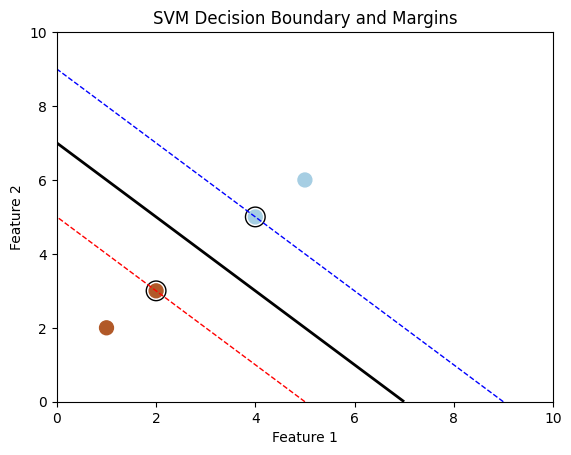

In [44]:
# generate a small dataset
X = np.array([[1, 2], [2, 3], [4, 5], [5, 6]])
y = np.array([1, 1, -1, -1])

# train SVM
clf = svm.SVC(kernel='linear', C=1) 
clf.fit(X, y)

# extract the weight vector and bias
w = clf.coef_[0]
b = clf.intercept_[0]

# plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
zz = w[0] * xx + w[1] * yy + b
plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='black')

# plot the margins
plt.contour(xx, yy, zz + 1, levels=[0], linestyles='dashed', linewidths=1, colors='blue')
plt.contour(xx, yy, zz - 1, levels=[0], linestyles='dashed', linewidths=1, colors='red')

# highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary and Margins')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Experiment 2

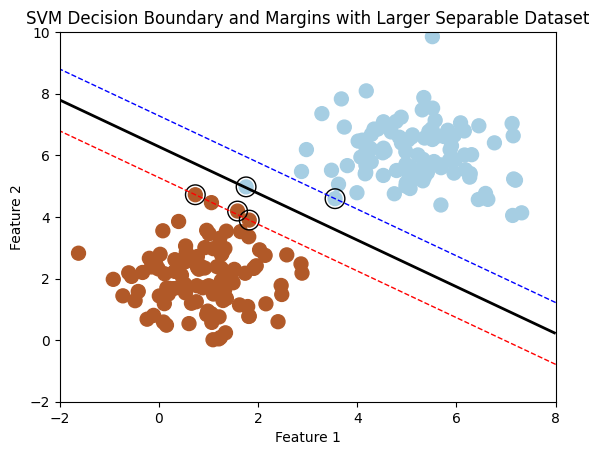

In [45]:
# generate a larger separable dataset
np.random.seed(42)
X1 = np.random.randn(100, 2) + [1, 2]
X2 = np.random.randn(100, 2) + [5, 6]
X = np.vstack([X1, X2])
y = np.array([1] * 100 + [-1] * 100)

# train SVM
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

# extract the weight vector and bias
w = clf.coef_[0]
b = clf.intercept_[0]

# plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 8, 100), np.linspace(-2, 10, 100))
zz = w[0] * xx + w[1] * yy + b
plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='black')

# plot the margins
plt.contour(xx, yy, zz + 1, levels=[0], linestyles='dashed', linewidths=1, colors='blue')
plt.contour(xx, yy, zz - 1, levels=[0], linestyles='dashed', linewidths=1, colors='red')

# highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary and Margins with Larger Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Experiment 3

In [46]:
def plot_svm_decision_boundary(X, y, clf, title):
    # extract the weight vector and bias
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

    # plot the decision boundary
    xx, yy = np.meshgrid(np.linspace(-2, 8, 100), np.linspace(-2, 10, 100))
    zz = w[0] * xx + w[1] * yy + b
    plt.contour(xx, yy, zz, levels=[0], linewidths=2, colors='black')

    # plot the margins
    plt.contour(xx, yy, zz + 1, levels=[0], linestyles='dashed', linewidths=1, colors='blue')
    plt.contour(xx, yy, zz - 1, levels=[0], linestyles='dashed', linewidths=1, colors='red')

    # highlight support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def experiment_with_different_K(X, y, K_values, title_prefix=''):
    for K in K_values:
        # train SVM
        clf = svm.SVC(kernel='linear', C=K)
        clf.fit(X, y)

        # plot SVM decision boundary and margins
        title = f'{title_prefix}SVM Decision Boundary and Margins with K={K}'
        plot_svm_decision_boundary(X, y, clf, title)

In [47]:
K_values = [1, 1e3, 1e6, 1e9, 1e12]

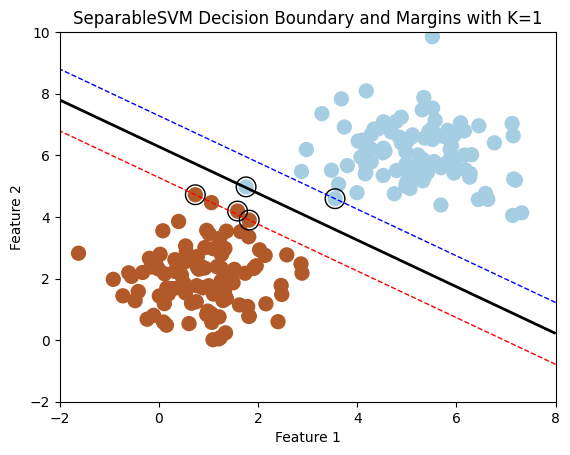

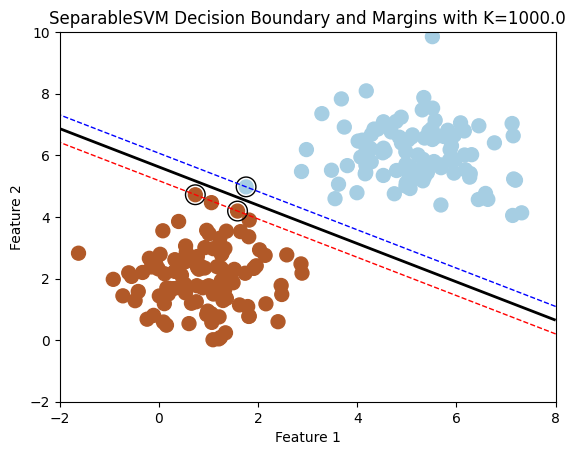

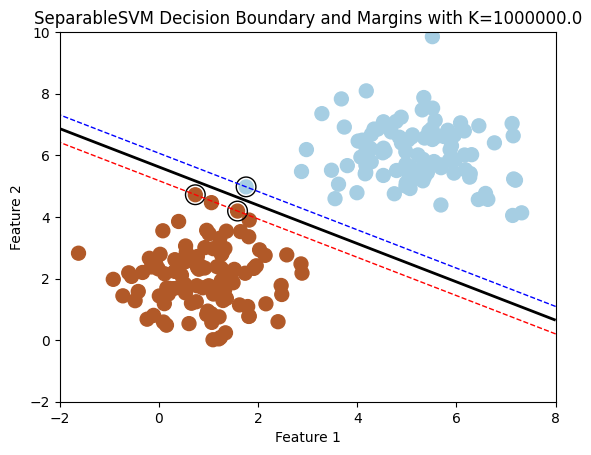

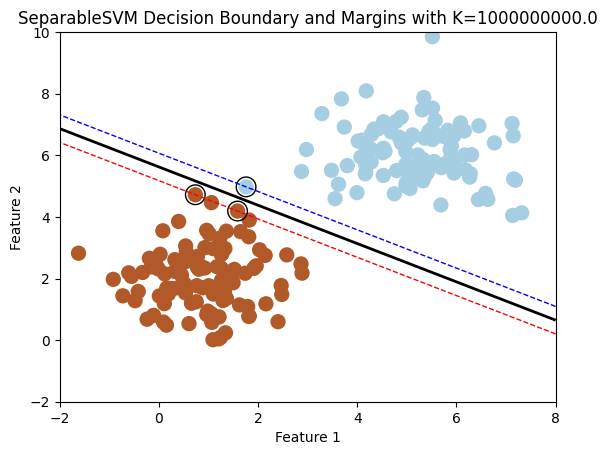

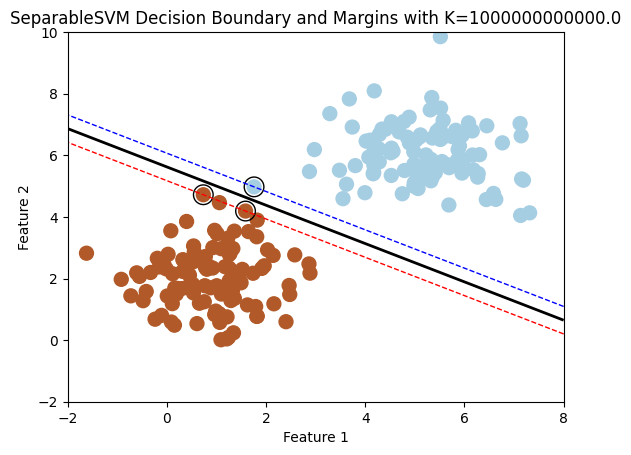

In [48]:
# generate a larger separable dataset
np.random.seed(42)
X1 = np.random.randn(100, 2) + [1, 2]
X2 = np.random.randn(100, 2) + [5, 6]
X_separable = np.vstack([X1, X2])
y_separable = np.array([1] * 100 + [-1] * 100)

# run experiment with separable dataset
experiment_with_different_K(X_separable, y_separable, K_values, title_prefix='Separable')

The role of K in SVM is to determine the trade-off betweeen maximizing the margin and allowing margin violations. Smaller K values prioritize a a smaller margin with fewer violations, while a larger K prioritizes a larger margin at the sacrifice of more violations. 

That being said, we can see that regardless of the value of K (with the exception of K=1), not only is the data separated the same, but the same support vectors are identified as well. This is related to the idea that because we are in the separable case, &alpha; has no upper threshold. This emphasizes the importance of support vectors in finding the optimal hyperplane. 

In conclusion, the lack of an upper threshold on &alpha; leads to the same support vectors being identified, which leads to the production of the same hyperplane, regardless of the value of K. 

### Experiment 4

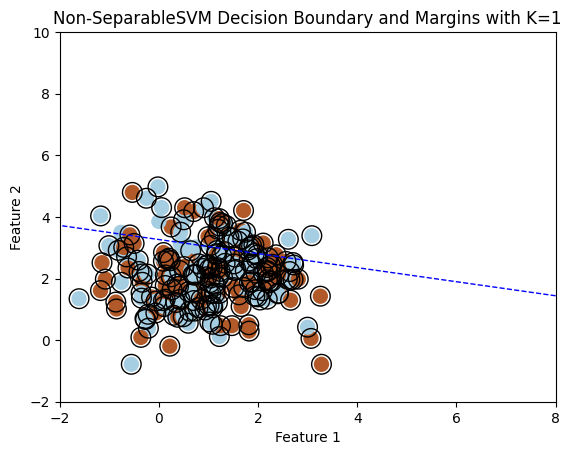

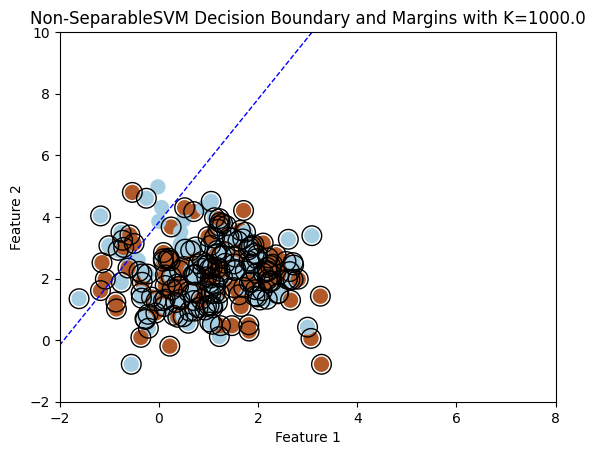

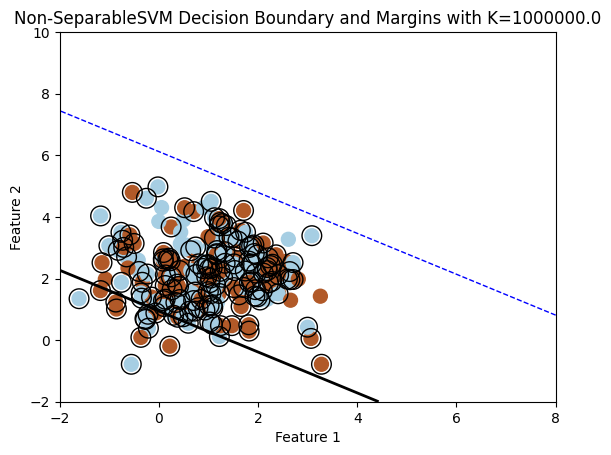

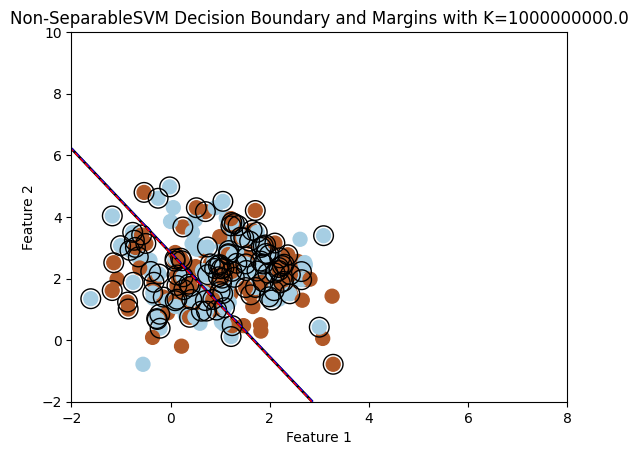

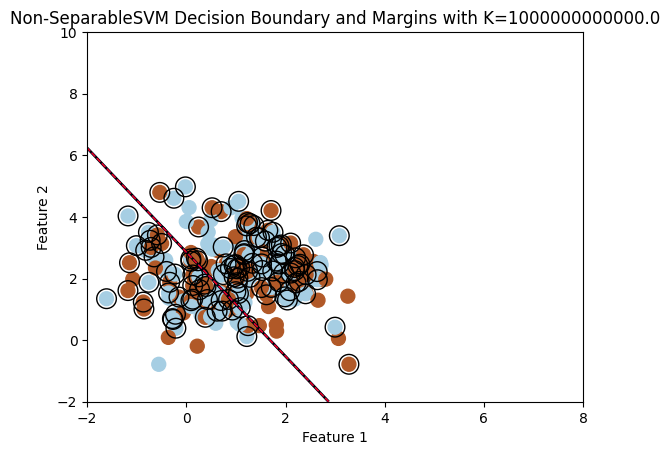

In [49]:
# generate a non-separable dataset
m_non_separable, s_non_separable = [1., 2.], [[1, 0], [0, 1]]
X_non_separable = np.random.multivariate_normal(m_non_separable, s_non_separable, 200)
y_non_separable = np.random.choice([-1, 1], size=200)

# run experiment with non-separable dataset
experiment_with_different_K(X_non_separable, y_non_separable, K_values, title_prefix='Non-Separable')

In the non-separable case, we can see that the opposite is true. A different optimal hyperplane is defined every time, and support vectors also change drastically with the increase of K. This is due to the fact that as K increases, violations are tolerated more and more, and a larger margin is sought after. 